In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip

from qutip import *

In [4]:
# two level atom
g = fock(2,0)
g

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [23]:
# excite the atom
create(2)*g

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [9]:
# atom light system fock(n,n-1)
n = 10
psi0 = tensor(fock(2,0),coherent(10,2))
psi0.ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [10]:
sigP = create(2)
sigM = destroy(2)
a = destroy(n)
ad = create(n)

wa = 1
wl = 1.3
rabi = 0.2

Hjc = - wa*tensor(sigmaz(),qeye(n))/2 + wl*tensor(qeye(2),ad*a) + rabi/2*(tensor(sigP,a) + tensor(sigM,ad))
Hjc

Quantum object: dims = [[2, 10], [2, 10]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.8         0.          0.          0.          0.
   0.          0.          0.          0.          0.1         0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          2.1         0.          0.          0.
   0.          0.          0.          0.          0.          0.14142136
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          3.4         0.          0.
   0.          0.          0.          0.          0.          0.
   0.17320508  0.          0.          0.          0.          0.
   0.          0.  

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.67557632+0.j         0.0382811 -0.08224166j]
 [0.0382811 +0.08224166j 0.32442368+0.j        ]]
0.675576324458801


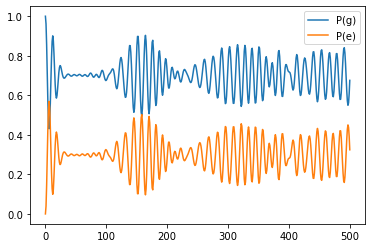

In [13]:
# projection operator on ground state of the atom
pg = tensor(Qobj([[1,0],[0,0]]), qeye(n))
pe = tensor(Qobj([[0,0],[0,1]]), qeye(n))

# dynamics of the system
tlist = np.linspace(0, 500, 500)
result = mesolve(Hjc, psi0, tlist)

print(result.states[-1].ptrace(0))
print(expect(pg, result.states[-1]))

# time evolution of the states of the atom
listG = expect(pg, result.states)
listE = expect(pe, result.states)

plt.plot(tlist,listG, label = 'P(g)')
plt.plot(tlist,listE, label = 'P(e)')
plt.legend()

<Figure size 432x288 with 0 Axes>

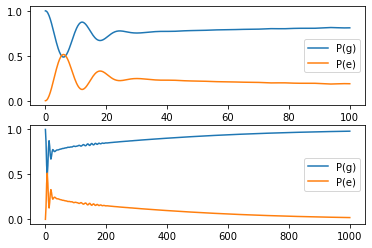

In [14]:
# now with spontaneous emissions
SErate = 0.2
SEop = SErate*tensor(sigM,qeye(n))

# short time dynamics (dephasing)
tlist_short = np.linspace(0, 100, 500)
resultG_short = mesolve(Hjc, psi0, tlist_short, SEop, pg)
resultE_short = mesolve(Hjc, psi0, tlist_short, SEop, pe)

# long time dynamics (only ground state population left, bc. all 9 photons sopntaneous emitted)
tlist_long = np.linspace(0, 1000, 500)
resultG_long = mesolve(Hjc, psi0, tlist_long, SEop, pg)
resultE_long = mesolve(Hjc, psi0, tlist_long, SEop, pe)

plt.figure()
plt.subplot

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(tlist_short,resultG_short.expect[0], label = 'P(g)')
ax1.plot(tlist_short,resultE_short.expect[0], label = 'P(e)')
ax1.legend()
ax2.plot(tlist_long,resultG_long.expect[0], label = 'P(g)')
ax2.plot(tlist_long,resultE_long.expect[0], label = 'P(e)')
ax2.legend()

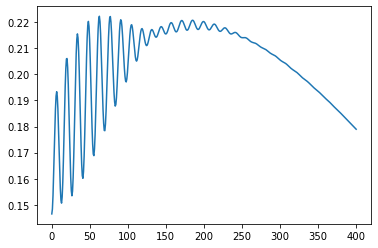

In [18]:
# now look on the occupation of the m-th excited state of the light
m = 2

# projection operator
pm = np.zeros((n,n))
pm[m,m] = 1
pm = tensor(qeye(2), Qobj(pm))
pm.ptrace(1)

tlist = np.linspace(0, 400, 500)
result = mesolve(Hjc, psi0, tlist, SEop, pm)

plt.plot(tlist,result.expect[0])